In [2]:
import pandas as pd
import tikzplotlib
import matplotlib.pyplot as plt

dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%y %H:%M')
df = pd.read_csv("../data/run_state_runtime.csv", delimiter=";", parse_dates=["Date"], date_parser=dateparse)
df

/var/folders/bq/l2q_cb9j6bj21nlxmzykz44r0000gn/T/ipykernel_47039/2335357354.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%y %H:%M')


,Date,Runtime,State
0,2023-04-24 11:58:00,11,finished
1,2023-04-24 11:58:00,20,finished
2,2023-04-24 12:13:00,2353,finished
3,2023-04-24 13:13:00,2995,finished
4,2023-04-24 15:03:00,8,failed
...,...,...,...
120,2023-07-20 15:13:00,37932,finished
121,2023-08-07 12:47:00,6663,crashed
122,2023-08-08 09:08:00,11030,failed
123,2023-08-08 15:26:00,1832,crashed


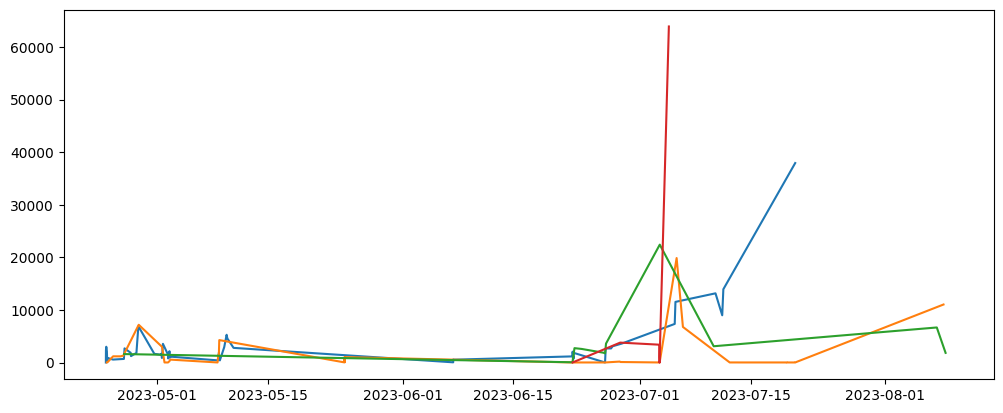

In [6]:
fig, ax = plt.subplots()
states = df["State"].unique()

for state in states:
    ax.plot(df[df["State"].str.contains(state)]["Date"], df[df["State"].str.contains(state)]["Runtime"], label=state)
# ax.legend()

fig.set_figwidth(12)
tikzplotlib.save("plots/runtime.tex")